In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## K-Means Clustering

## Introduction

The K-Means algorithm is a widely used method for clustering data points in a multidimensional space. It alternates between assigning data points to clusters and updating cluster centers until convergence.

---

## Mathematical Formulation

Given a dataset $ \{x_1, x_2, \dots, x_N\} $, our goal is to partition it into $ K $ clusters. Each cluster is represented by a mean vector $ \mu_k $, where $ k = 1, \dots, K $.

### Objective Function

We define the **objective function** as:
$$
J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \| x_n - \mu_k \|^2
$$
where:
- $ r_{nk} \in \{0, 1\} $ indicates whether the $ n $-th data point is assigned to the $ k $-th cluster.
- $ \| x_n - \mu_k \|^2 $ is the squared Euclidean distance between $ x_n $ and $ \mu_k $.

---

### Steps of the Algorithm

1. **Initialization**:
   Randomly initialize the cluster centers $ \mu_k $.

2. **E-Step**: Assign each data point $ x_n $ to the nearest cluster:
   $$
   r_{nk} = 
   \begin{cases} 
   1, & \text{if } k = \arg \min_j \| x_n - \mu_j \|^2 \\ 
   0, & \text{otherwise.}
   \end{cases}
   $$

3. **M-Step**: Update the cluster centers \( \mu_k \) as the mean of assigned points:
   $$
   \mu_k = \frac{\sum_{n=1}^N r_{nk} x_n}{\sum_{n=1}^N r_{nk}}
   $$

4. **Convergence**:
   Repeat steps 2 and 3 until the cluster assignments no longer change or a maximum number of iterations is reached.

---



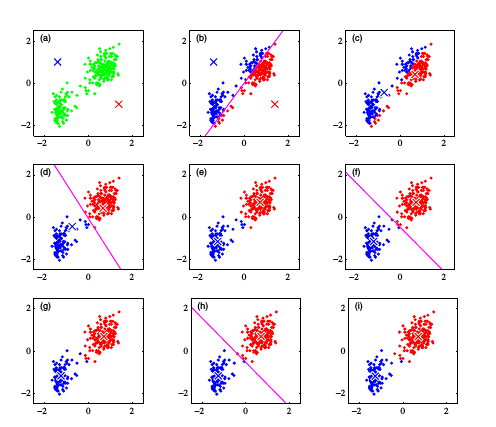

Fig.1 Illustration of the K-means algorithm using the re-scaled Old Faithful data set. (a) Green points denote the data set in a two-dimensional Euclidean space. The initial choices for centres µ1 and µ2 are shown by the red and blue crosses, respectively. (b) In the initial E step, each data point is assigned either to the red cluster or to the blue cluster, according to which cluster centre is nearer. This is equivalent to classifying the points according to which side of the perpendicular bisector of the two cluster centres, shown by the magenta line, they lie on. (c) In the subsequent M step, each cluster centre is re-computed to be the mean of the points assigned to the corresponding cluster. (d)–(i) show successive E and M steps through to ﬁnal convergence of the algorithm.

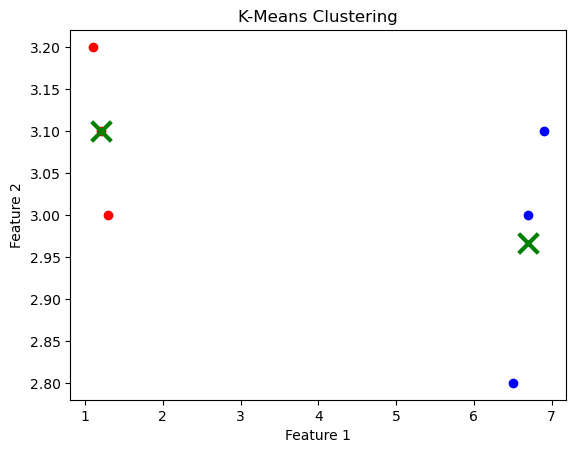

In [2]:
# K-Means Clustering Implementation

# The K-Means algorithm clusters data points into K groups. It alternates 
# between assigning points to clusters and updating cluster centers until convergence.

class KMeans:
    def __init__(self, k, max_iter=100, tol=1e-4):
        """
        Initialize the K-Means algorithm.
        :param k: Number of clusters
        :param max_iter: Maximum iterations
        :param tol: Tolerance for convergence
        """
        self.k = k
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, data):
        """
        Fit the K-Means model to the data.
        :param data: List of data points, where each point is a list of coordinates
        """
        import random
        # Step 1: Randomly initialize the cluster centers
        self.centers = random.sample(data, self.k)
        
        for _ in range(self.max_iter):
            # Step 2: Assign each data point to the nearest cluster
            clusters = {i: [] for i in range(self.k)}
            for point in data:
                distances = [sum((point[d] - center[d])**2 for d in range(len(point))) for center in self.centers]
                cluster_index = distances.index(min(distances))
                clusters[cluster_index].append(point)

            # Step 3: Update the cluster centers
            new_centers = []
            for i in range(self.k):
                if clusters[i]:  # Avoid division by zero
                    new_center = [sum(point[d] for point in clusters[i]) / len(clusters[i]) for d in range(len(data[0]))]
                    new_centers.append(new_center)
                else:
                    new_centers.append(self.centers[i])  # Keep the same center if no points are assigned
            
            # Check for convergence
            max_change = max(sum((new_centers[i][d] - self.centers[i][d])**2 for d in range(len(data[0]))) for i in range(self.k))
            if max_change < self.tol:
                break
            
            self.centers = new_centers

        return self

    def predict(self, data):
        """
        Assign each data point to the nearest cluster.
        :param data: List of data points
        :return: List of cluster indices
        """
        labels = []
        for point in data:
            distances = [sum((point[d] - center[d])**2 for d in range(len(point))) for center in self.centers]
            cluster_index = distances.index(min(distances))
            labels.append(cluster_index)
        return labels


# Example Usage
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    # Example dataset
    data = [
        [1.1, 3.2], [1.2, 3.1], [1.3, 3.0],
        [6.5, 2.8], [6.7, 3.0], [6.9, 3.1]
    ]

    # Apply K-Means
    kmeans = KMeans(k=2)
    kmeans.fit(data)
    labels = kmeans.predict(data)

    # Visualize results
    for i, point in enumerate(data):
        plt.scatter(point[0], point[1], color='red' if labels[i] == 0 else 'blue')
    for center in kmeans.centers:
        plt.scatter(center[0], center[1], color='green', marker='x', s=200, linewidths=3)

    plt.title("K-Means Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


## K-Means Algorithm Analysis and Applications

## Cost Function and Convergence

### Cost Function $ J $

The cost function $ J $ at each step of the K-means algorithm is defined as:

$$
J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \| x_n - \mu_k \|^2
$$

where:

- $ r_{nk} $ is a binary indicator that equals 1 if data point $ x_n $ is assigned to cluster $ k $, and 0 otherwise.
- $ \mu_k $ is the prototype vector (cluster center) for cluster $ k $.

A plot of $ J $ after each **E-step** (blue points) and **M-step** (red points) is shown in Fig.2.

- The algorithm converges after the third M-step.
- Poor initialization of $ \mu_k $ can lead to slower convergence. A better initialization method selects $ K $ random data points as initial cluster centers.

### Computational Complexity

The computational cost for each step:

- **E-Step**: $ O(KN) $, where $ K $ is the number of clusters and $ N $ is the number of data points.
- **M-Step**: Updates the cluster prototypes $ \mu_k $.

To optimize, methods such as precomputing data structures (e.g., trees) or applying the triangle inequality can reduce computation time.

### Online K-Means Algorithm

In the online (sequential) version, the cluster prototypes are updated using the rule:

$$
\mu_k^{\text{new}} = \mu_k^{\text{old}} + \eta_n (x_n - \mu_k^{\text{old}})
$$

where:

- $ \eta_n $ is the learning rate parameter, which decreases monotonically with $ n $.
- $ x_n $ is the current data point.

## Generalization: K-Medoids Algorithm

To make the K-means algorithm more robust to outliers and applicable to non-Euclidean data, we introduce a general dissimilarity measure \( V(x, x') \):

$$
J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} V(x_n, \mu_k)
$$

### Computational Complexity of K-Medoids

- **E-Step**: $]] O(KN) $, similar to K-means.
- **M-Step**: $ O(N_k^2) $, where $ N_k $ is the number of data points in cluster $ k $.

By restricting cluster prototypes to one of the data vectors, the algorithm can be implemented for any dissimilarity measure \( V(\cdot, \cdot) \).

## Soft Assignments and Probabilistic Formulation

Unlike K-means, which assigns each data point to a single cluster, a probabilistic approach provides *soft* assignments:

$$
P(z_n = k | x_n) = \frac{\exp(-\frac{1}{2} \| x_n - \mu_k \|^2)}{\sum_{j=1}^K \exp(-\frac{1}{2} \| x_n - \mu_j \|^2)}
$$

This reflects the uncertainty of the assignment and has several advantages in modeling.

## Applications

### Image Segmentation and Compression

#### Image Segmentation

Each pixel is treated as a data point in a 3D space of {R, G, B} intensities. The K-means algorithm replaces each pixel value with the intensity of the cluster center \( \mu_k \) to which it is assigned.

#### Compression

For lossy compression, the K-means algorithm stores:

1. Cluster assignments $ r_{nk} $.
2. Cluster centers $ \mu_k $.

The compressed size can be computed as:

$$
\text{Compressed Bits} = 24K + N \log_2 K
$$

where:

- $ K $ is the number of clusters.
- $ N $ is the number of pixels.

#### Example Calculation

Original image: $ 240 \times 180 = 43,200 $ pixels. Each pixel has 24-bit RGB values. The total uncompressed size:

$$
\text{Uncompressed Bits} = 24 \times 43,200 = 1,036,800 \, \text{bits}
$$

Compressed results for various $ K $:

- $ K = 2 $:
  $$ \text{Compressed Bits} = 24 \times 2 + 43,200 \times \log_2 2 = 43,248 $$
  $$ \text{Compression Ratio} = \frac{43,248}{1,036,800} \approx 4.2\% $$

- $ K = 3 $:
  $$ \text{Compressed Bits} = 24 \times 3 + 43,200 \times \log_2 3 = 86,472 $$
  $$ \text{Compression Ratio} = \frac{86,472}{1,036,800} \approx 8.3\% $$

- $ K = 10 $:
  $$ \text{Compressed Bits} = 24 \times 10 + 43,200 \times \log_2 10 = 173,040 $$
  $$ \text{Compression Ratio} = \frac{173,040}{1,036,800} \approx 16.7\% $$

#### Trade-Off

There is a trade-off between compression level and image quality. Improved compression may involve grouping nearby pixels into small blocks (e.g., $ 5 \times 5 $).

---

### Vector Quantization

The compressed image data can also be viewed as vector quantization. The cluster centers $ \mu_k $ act as *code-book vectors* for reconstructing the image.

---



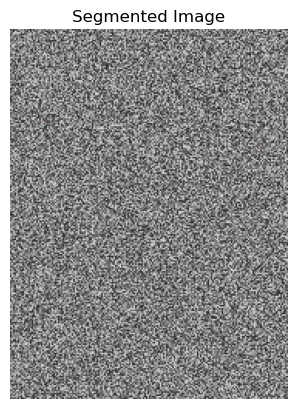

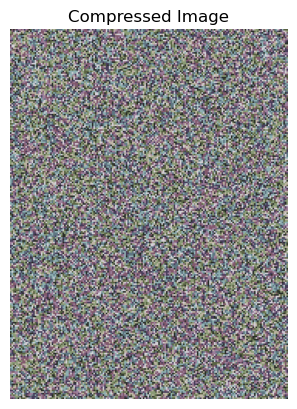

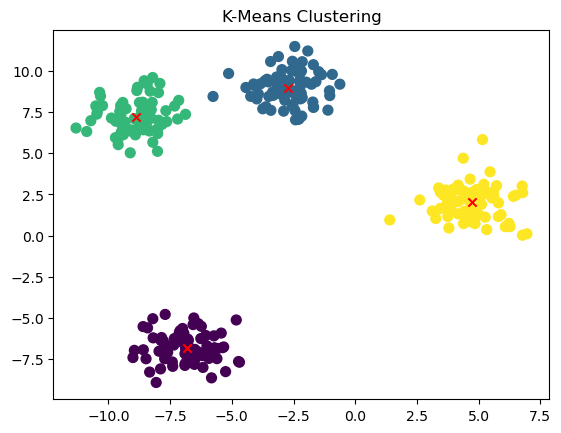

IndexError: boolean index did not match indexed array along dimension 1; dimension is 113 but corresponding boolean dimension is 300

In [5]:
import numpy as np
from sklearn.cluster import KMeans
from skimage import io
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# -------------------------
# K-Means Algorithm
# -------------------------
def initialize_centroids(data, k):
    """Randomly initialize k centroids from the data."""
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    """Update centroids as the mean of assigned points."""
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(data, k, max_iters=100, tol=1e-4):
    """K-Means clustering algorithm."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, labels

# -------------------------
# K-Medoids Algorithm
# -------------------------
def dissimilarity_matrix(data, metric='euclidean'):
    """Calculate the dissimilarity matrix for the data."""
    return cdist(data, data, metric=metric)

def kmedoids(data, k, max_iters=100):
    """K-Medoids clustering algorithm."""
    n = data.shape[0]
    medoids = np.random.choice(n, k, replace=False)
    for _ in range(max_iters):
        labels = np.argmin(dissimilarity_matrix(data)[medoids], axis=0)
        new_medoids = np.array([
            data[labels == i][np.argmin(dissimilarity_matrix(data[labels == i])[:, labels == i].sum(axis=1))]
            for i in range(k)
        ])
        if np.array_equal(new_medoids, medoids):
            break
        medoids = new_medoids
    return medoids, labels

# -------------------------
# Image Segmentation with K-Means
# -------------------------
def segment_image(image_path, k):
    """Segment an image using the K-Means algorithm."""
    image = io.imread(image_path) / 255.0  # Normalize pixel values to [0, 1]
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pixels)
    segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]
    segmented_image = segmented_pixels.reshape(image.shape)
    return segmented_image

# -------------------------
# Image Compression with K-Means
# -------------------------
def compress_image(image_path, k):
    """Compress an image using vector quantization."""
    image = io.imread(image_path) / 255.0  # Normalize pixel values to [0, 1]
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pixels)
    compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image = compressed_pixels.reshape(image.shape)
    return compressed_image

# -------------------------
# Soft Assignments (Probabilistic)
# -------------------------
def soft_assignments(data, centroids, beta=1.0):
    """Compute soft assignments for data points."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    weights = np.exp(-beta * distances)
    probabilities = weights / weights.sum(axis=1, keepdims=True)
    return probabilities

# -------------------------
# Testing and Visualization
# -------------------------
if __name__ == "__main__":
    # Example usage: Image Segmentation
    image_path = "example.jpg"  # Replace with your image file path

    # Image Segmentation
    segmented_image = segment_image(image_path, k=5)
    plt.title("Segmented Image")
    plt.imshow(segmented_image)
    plt.axis('off')
    plt.show()

    # Image Compression
    compressed_image = compress_image(image_path, k=10)
    plt.title("Compressed Image")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()

    # Example usage: Synthetic Data Clustering
    from sklearn.datasets import make_blobs
    data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

    # K-Means Clustering
    k = 4
    centroids, labels = kmeans(data, k)
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x')
    plt.title("K-Means Clustering")
    plt.show()

    # K-Medoids Clustering
    medoids, labels = kmedoids(data, k)
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(data[medoids, 0], data[medoids, 1], color='blue', marker='o')
    plt.title("K-Medoids Clustering")
    plt.show()


## Gaussian Mixture Models (GMM)

In this section, we delve into Gaussian Mixture Models (GMMs), which are formulated in terms of discrete latent variables. This provides deeper insights and motivates the Expectation-Maximization (EM) algorithm.

## Gaussian Mixture Distribution

The Gaussian mixture distribution can be written as:

$$
p(x) = \sum_{k=1}^K \pi_k \mathcal{N}(x \mid \mu_k, \Sigma_k)
$$

Here:
- $ \pi_k $: Mixing coefficients
- $ \mu_k, \Sigma_k $: Mean and covariance of the $k$-th Gaussian component

---

## Latent Variable Representation

Introduce a \(K\)-dimensional binary random variable $z$ with a **1-of-K** representation:
- $ z_k \in \{0, 1\} $
- $ \sum_{k=1}^K z_k = 1 $

### Marginal Distribution over \(z\)
The marginal distribution of \(z\) is defined by mixing coefficients $ \pi_k $:
$$
p(z_k = 1) = \pi_k, \quad 0 \leq \pi_k \leq 1, \quad \sum_{k=1}^K \pi_k = 1
$$

In terms of the $1$-of-$K$ representation:
$$
p(z) = \prod_{k=1}^K \pi_k^{z_k}
$$

### Conditional Distribution $p(x \mid z)$
If $z_k = 1$, the conditional distribution of $x$ is Gaussian:
$$
p(x \mid z_k = 1) = \mathcal{N}(x \mid \mu_k, \Sigma_k)
$$

This can also be expressed as:
$$
p(x \mid z) = \prod_{k=1}^K \mathcal{N}(x \mid \mu_k, \Sigma_k)^{z_k}
$$

### Joint Distribution $p(x, z)$
The joint distribution of $x$ and $z$ is:
$$
p(x, z) = p(z)p(x \mid z)
$$

Marginalizing $z$, we recover the Gaussian mixture:
$$
p(x) = \sum_{k=1}^K \pi_k \mathcal{N}(x \mid \mu_k, \Sigma_k)
$$

---

## Posterior Distribution of $z$

Using Bayes' theorem, the posterior $p(z_k = 1 \mid x)$ is:
$$
\gamma(z_k) \equiv p(z_k = 1 \mid x) = \frac{\pi_k \mathcal{N}(x \mid \mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j \mathcal{N}(x \mid \mu_j, \Sigma_j)}
$$

Here:
- $ \pi_k $: Prior probability of $z_k = 1$
- $ \gamma(z_k) $: Responsibility of component $k$ for explaining $x$

---

## Sampling from a Gaussian Mixture

To sample from $p(x)$:
1. Sample $z \sim p(z)$.
2. Sample $x \sim p(x \mid z)$.

### Visualizing Samples
- **Joint distribution $p(x, z)$:** Plot $x$, colored by the corresponding $z$.
- **Marginal distribution $p(x)$:** Ignore $z$ and plot only $x$.
- **Responsibilities $ \gamma(z_k) $:** Use color proportions to represent posterior probabilities.

---

## Responsibilities Visualization

For each data point \(x_n\):
- Evaluate $ \gamma(z_{nk}) $ for $k = 1, 2, \dots, K$.
- Represent the responsibilities using proportions of RGB (e.g., red for $k=1$, green for $k=2$, blue for $k=3$).

---

### Summary

The GMM framework introduces:
- Richer density models than single Gaussian distributions
- Latent variables $(z$) for deeper insights
- Probabilistic "soft" clustering via responsibilities (\(\gamma(z_k)\))
- Foundation for the Expectation-Maximization (EM) algorithm


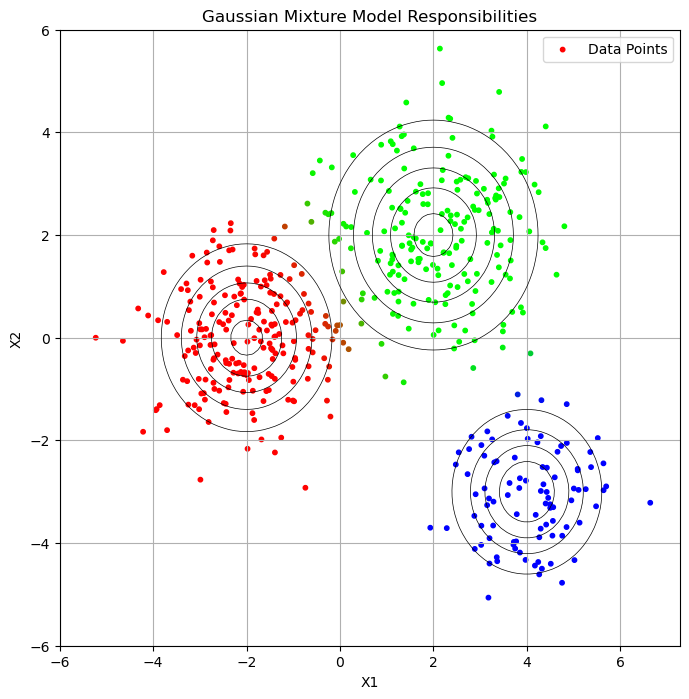

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Function to generate synthetic data from a GMM
def generate_gmm_data(n_samples, means, covariances, mixing_coeffs):
    """Generate synthetic data from a GMM."""
    n_components = len(mixing_coeffs)
    data = []
    labels = []

    for _ in range(n_samples):
        # Choose a component based on mixing coefficients
        component = np.random.choice(n_components, p=mixing_coeffs)
        sample = np.random.multivariate_normal(means[component], covariances[component])
        data.append(sample)
        labels.append(component)
    
    return np.array(data), np.array(labels)

# Function to compute responsibilities
def compute_responsibilities(data, means, covariances, mixing_coeffs):
    """Compute responsibilities (posterior probabilities) for each component."""
    n_samples, n_components = len(data), len(means)
    responsibilities = np.zeros((n_samples, n_components))
    
    for k in range(n_components):
        # Evaluate Gaussian for component k
        responsibilities[:, k] = mixing_coeffs[k] * multivariate_normal.pdf(
            data, mean=means[k], cov=covariances[k]
        )
    
    # Normalize responsibilities
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    return responsibilities

# Visualizing data and responsibilities
def plot_gmm_results(data, responsibilities, means, covariances, true_labels=None):
    """Plot data with responsibilities as RGB proportions."""
    colors = responsibilities @ np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    plt.figure(figsize=(8, 8))
    
    # Scatter plot with colors based on responsibilities
    plt.scatter(data[:, 0], data[:, 1], c=colors, s=10, label='Data Points')
    
    # Overlay Gaussian components
    for mean, cov in zip(means, covariances):
        plot_gaussian_contour(mean, cov)
    
    plt.title("Gaussian Mixture Model Responsibilities")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid()
    plt.legend()
    plt.show()

def plot_gaussian_contour(mean, cov):
    """Plot a 2D Gaussian contour."""
    x, y = np.meshgrid(np.linspace(-6, 6, 100), np.linspace(-6, 6, 100))
    xy = np.dstack((x, y))
    z = multivariate_normal(mean, cov).pdf(xy)
    plt.contour(x, y, z, levels=5, linewidths=0.5, colors='k')

# Parameters of the GMM
means = [np.array([-2, 0]), np.array([2, 2]), np.array([4, -3])]
covariances = [np.eye(2), np.eye(2) * 1.5, np.eye(2) * 0.8]
mixing_coeffs = [0.4, 0.4, 0.2]

# Generate synthetic data
n_samples = 500
data, true_labels = generate_gmm_data(n_samples, means, covariances, mixing_coeffs)

# Compute responsibilities
responsibilities = compute_responsibilities(data, means, covariances, mixing_coeffs)

# Visualize results
plot_gmm_results(data, responsibilities, means, covariances)


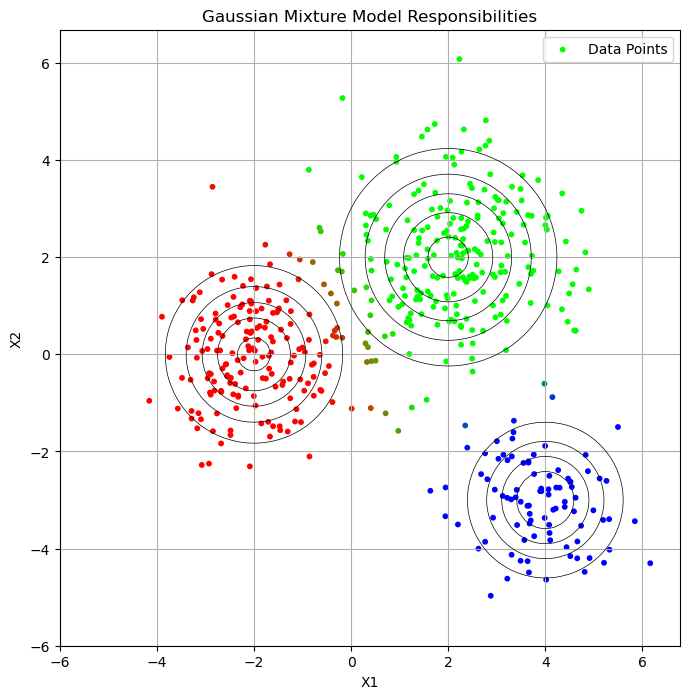

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate synthetic data from a GMM
def generate_gmm_data(n_samples, means, covariances, mixing_coeffs):
    """Generate synthetic data from a GMM."""
    n_components = len(mixing_coeffs)
    data = []
    labels = []

    for _ in range(n_samples):
        # Choose a component based on mixing coefficients
        component = np.random.choice(n_components, p=mixing_coeffs)
        sample = np.random.multivariate_normal(means[component], covariances[component])
        data.append(sample)
        labels.append(component)
    
    return np.array(data), np.array(labels)

# Function to calculate Gaussian probability density function
def gaussian_pdf(x, mean, covariance):
    """Compute the Gaussian PDF."""
    dim = len(mean)
    det_cov = np.linalg.det(covariance)
    inv_cov = np.linalg.inv(covariance)
    norm_factor = 1 / (np.sqrt((2 * np.pi) ** dim * det_cov))
    
    diff = x - mean
    exponent = -0.5 * np.dot(diff.T, np.dot(inv_cov, diff))
    
    return norm_factor * np.exp(exponent)

# Function to compute responsibilities
def compute_responsibilities(data, means, covariances, mixing_coeffs):
    """Compute responsibilities (posterior probabilities) for each component."""
    n_samples, n_components = len(data), len(means)
    responsibilities = np.zeros((n_samples, n_components))
    
    for i, x in enumerate(data):
        for k in range(n_components):
            responsibilities[i, k] = mixing_coeffs[k] * gaussian_pdf(x, means[k], covariances[k])
        
        # Normalize responsibilities
        responsibilities[i, :] /= np.sum(responsibilities[i, :])
    
    return responsibilities

# Visualizing data and responsibilities
def plot_gmm_results(data, responsibilities, means, covariances):
    """Plot data with responsibilities as RGB proportions."""
    colors = responsibilities @ np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    plt.figure(figsize=(8, 8))
    
    # Scatter plot with colors based on responsibilities
    plt.scatter(data[:, 0], data[:, 1], c=colors, s=10, label='Data Points')
    
    # Overlay Gaussian components
    for mean, cov in zip(means, covariances):
        plot_gaussian_contour(mean, cov)
    
    plt.title("Gaussian Mixture Model Responsibilities")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid()
    plt.legend()
    plt.show()

def plot_gaussian_contour(mean, cov):
    """Plot a 2D Gaussian contour."""
    x, y = np.meshgrid(np.linspace(-6, 6, 100), np.linspace(-6, 6, 100))
    xy = np.dstack((x, y))
    z = np.array([gaussian_pdf(pt, mean, cov) for pt in xy.reshape(-1, 2)])
    z = z.reshape(x.shape)
    plt.contour(x, y, z, levels=5, linewidths=0.5, colors='k')

# Parameters of the GMM
means = [np.array([-2, 0]), np.array([2, 2]), np.array([4, -3])]
covariances = [np.eye(2), np.eye(2) * 1.5, np.eye(2) * 0.8]
mixing_coeffs = [0.4, 0.4, 0.2]

# Generate synthetic data
n_samples = 500
data, true_labels = generate_gmm_data(n_samples, means, covariances, mixing_coeffs)

# Compute responsibilities
responsibilities = compute_responsibilities(data, means, covariances, mixing_coeffs)

# Visualize results
plot_gmm_results(data, responsibilities, means, covariances)


Convergence reached at iteration 10


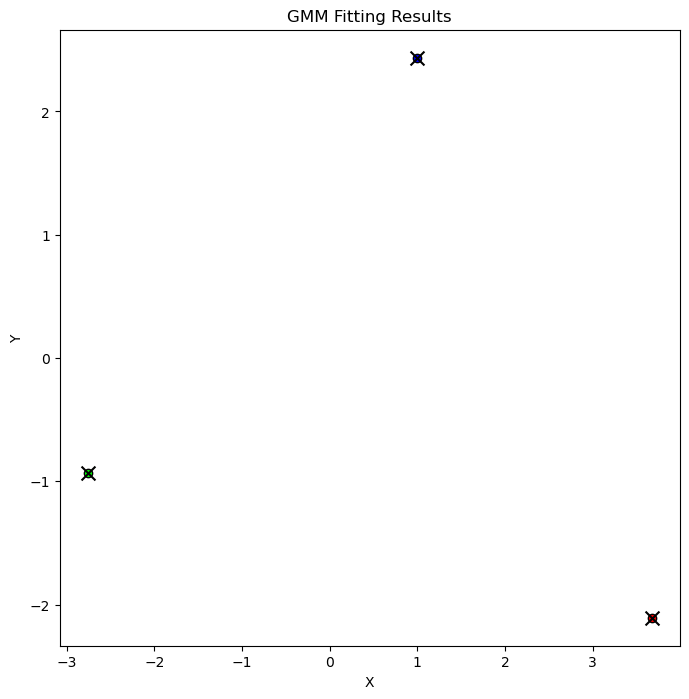

In [13]:
import random
import math
import matplotlib.pyplot as plt

import math

def gaussian_pdf(x, mean, covariance):
    # Dimension of the data
    dim = len(x)
    
    # Check if covariance is a matrix or a list (assuming diagonal covariance)
    if isinstance(covariance[0], list):  # Full covariance matrix
        # Extract diagonal (for diagonal covariance matrix)
        covariance = [covariance[i][i] for i in range(dim)]
    
    # Add a small regularization value to the diagonal elements of covariance matrix
    regularization = 1e-6
    covariance = [cov if cov > regularization else regularization for cov in covariance]  # Regularize covariance diagonal
    
    # Calculate the determinant of the covariance matrix (assuming diagonal covariance matrix)
    det_cov = 1
    for cov in covariance:
        det_cov *= cov  # For diagonal covariance, the determinant is the product of diagonal elements
    
    # Normalization factor
    norm_factor = 1 / (math.sqrt((2 * math.pi) ** dim * det_cov))
    
    # Difference vector (x - mean)
    diff = [x[i] - mean[i] for i in range(dim)]
    
    # Compute the exponent: (x - mean)^T * covariance^-1 * (x - mean)
    exponent = sum(diff[i] * diff[i] / covariance[i] for i in range(dim))  # Diagonal covariance
    
    # Final result of the Gaussian PDF
    return norm_factor * math.exp(-0.5 * exponent)



# E-step: Compute responsibilities (posterior probabilities)
def e_step(data, means, covariances, mixing_coeffs):
    """Compute responsibilities (posterior probabilities) for each component."""
    n_samples = len(data)
    n_components = len(means)
    
    responsibilities = []
    
    for i in range(n_samples):
        x = data[i]
        # Compute the numerator for each component (responsibilities)
        total = 0.0
        resp = []
        
        for k in range(n_components):
            prob = mixing_coeffs[k] * gaussian_pdf(x, means[k], covariances[k])
            resp.append(prob)
            total += prob
        
        # Normalize responsibilities to sum to 1
        responsibilities.append([r / total for r in resp])
    
    return responsibilities

# M-step: Update the parameters (means, covariances, mixing coefficients)
def m_step(data, responsibilities):
    """Update the parameters (means, covariances, mixing coefficients)."""
    n_samples = len(data)
    n_components = len(responsibilities[0])
    n_features = len(data[0])
    
    # Update means
    means = []
    for k in range(n_components):
        weighted_sum = [0.0 for _ in range(n_features)]
        weight = 0.0
        for i in range(n_samples):
            for j in range(n_features):
                weighted_sum[j] += responsibilities[i][k] * data[i][j]
            weight += responsibilities[i][k]
        
        means.append([sum_val / weight for sum_val in weighted_sum])
    
    # Update covariances
    covariances = []
    for k in range(n_components):
        weighted_cov = [[0.0 for _ in range(n_features)] for _ in range(n_features)]
        weight = 0.0
        for i in range(n_samples):
            diff = [data[i][j] - means[k][j] for j in range(n_features)]
            for j in range(n_features):
                for l in range(n_features):
                    weighted_cov[j][l] += responsibilities[i][k] * diff[j] * diff[l]
            weight += responsibilities[i][k]
        
        covariances.append([[cell / weight for cell in row] for row in weighted_cov])
    
    # Update mixing coefficients
    mixing_coeffs = [0.0 for _ in range(n_components)]
    for k in range(n_components):
        mixing_coeffs[k] = sum(responsibilities[i][k] for i in range(n_samples)) / n_samples
    
    return means, covariances, mixing_coeffs

# Function to fit GMM using EM algorithm
def fit_gmm(data, n_components, n_iterations=100, tol=1e-6):
    """Fit a Gaussian Mixture Model to the data using the EM algorithm."""
    n_samples = len(data)
    n_features = len(data[0])
    
    # Initialize parameters randomly
    means = [[random.random() for _ in range(n_features)] for _ in range(n_components)]
    covariances = [[[random.random() if i == j else 0.0 for j in range(n_features)] for i in range(n_features)] for _ in range(n_components)]
    mixing_coeffs = [1.0 / n_components for _ in range(n_components)]
    
    log_likelihoods = []
    
    for iteration in range(n_iterations):
        # E-step: Calculate responsibilities
        responsibilities = e_step(data, means, covariances, mixing_coeffs)

        # M-step: Update the parameters
        means, covariances, mixing_coeffs = m_step(data, responsibilities)

        # Compute the log-likelihood of the data given the current parameters
        log_likelihood = 0.0
        for i in range(n_samples):
            likelihood = 0.0
            for k in range(n_components):
                likelihood += mixing_coeffs[k] * gaussian_pdf(data[i], means[k], covariances[k])
            log_likelihood += math.log(likelihood)
        
        log_likelihoods.append(log_likelihood)
        
        # Check for convergence
        if iteration > 0 and abs(log_likelihood - log_likelihoods[-2]) < tol:
            print(f"Convergence reached at iteration {iteration + 1}")
            break
    
    return means, covariances, mixing_coeffs, responsibilities, log_likelihoods

# Visualization function to plot results
import matplotlib.pyplot as plt

def plot_gmm_results(data, responsibilities, means, covariances):
    colors = []
    for resp in responsibilities:
        # Multiply each color component by the responsibility for that component
        color = [sum(resp[k] * c[k] for k in range(3)) for c in [[1, 0, 0], [0, 1, 0], [0, 0, 1]]]
        colors.append(color)
    
    # Convert data to a numpy array for plotting
    data = [list(point) for point in data]  # Ensure data is in the correct format
    
    # Plot data points
    plt.figure(figsize=(8, 8))
    for i, point in enumerate(data):
        plt.scatter(point[0], point[1], color=colors[i], marker='o', edgecolors='k')
    
    # Plot means
    for mean in means:
        plt.scatter(mean[0], mean[1], color='black', marker='x', s=100)
    
    plt.title('GMM Fitting Results')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


def plot_gaussian_contour(mean, cov):
    """Plot a 2D Gaussian contour."""
    x, y = plt.meshgrid(range(-6, 6), range(-6, 6))
    xy = np.stack([x.flatten(), y.flatten()], axis=1)
    z = [gaussian_pdf(pt, mean, cov) for pt in xy]
    z = np.array(z).reshape(x.shape)
    plt.contour(x, y, z, levels=5, linewidths=0.5, colors='k')

# Parameters of the GMM
means = [[-2, 0], [2, 2], [4, -3]]
covariances = [[[1, 0], [0, 1]], [[1.5, 0], [0, 1.5]], [[0.8, 0], [0, 0.8]]]
mixing_coeffs = [0.4, 0.4, 0.2]

# Generate synthetic data
n_samples = 500
#data = [[random.gauss(mean[0], 1), random.gauss(mean[1], 1)) for mean in means]  # Simplified data generation
# Generate synthetic data
n_samples = 500
data = [[random.gauss(mean[0], 1), random.gauss(mean[1], 1)] for mean in means]  # Simplified data generation
# Fit GMM using EM algorithm
n_components = 3
means, covariances, mixing_coeffs, responsibilities, log_likelihoods = fit_gmm(data, n_components)

# Visualize the fitted GMM
plot_gmm_results(data, responsibilities, means, covariances)
